---



* BDA 8기 데이터 분석 모델링 반
* 제작자 : 김지훈
* 8주차 스터지 주제 : k-means
* Original source:

---



## 문제.1: K-평균 클러스터링의 기본 원리를 설명하시오.

K-평균 클러스터링(K-means clustering)은 어떻게 데이터를 그룹화하는지 그 원리에 대해 설명하시오. 이때 초기 중심점 선택의 중요성과 이 과정에서의 무작위성이 결과에 어떤 영향을 미치는지 포함시키시오.

### Kmeans 알고리즘의 기본 원리
- 데이터를 K개의 클러스터로 그룹화하는 알고리즘으로, 데이터 포인트끼리 얼마나 가까운지를 기준으로 그룹화한다.
- 클러스터의 중심점(Centroid)을 가지고, 클러스터를 할당하거나 중심점을 업데이트 하는 방식으로 작동한다.

#### 할당 단계
- 각 데이터 포인트를 가장 가까운 중심에 할당
#### 업데이트 단계
- 각 클러스터의 중심을 이동

### Kmeans 클러스터링 알고리즘의 작동단계
1. 클러스터(k)의 개수에 따라 무작위로 중심점을 정한다.
2. 데이터 포인트 마다 가장 가까운 중심점을 찾아 해당 클러스터로 분류한다.
3. 데이터가 클러스터로 분류될 때마다, 클러스터의 중심을 업데이트 한다.
4. 2,3 번 과정을 반복한 후, 중심점이 변화가 없고 수렴할 경우 알고리즘을 종료한다

### 초기중심선택의 중요성
- 지역 최적해: K-means는 초기 중심점에 따라 다른 지역 최적해(local optimum)에 수렴할 가능성이 있다.
        - 무작위로 선택된 중심점이 적절하지 않으면 최종 클러스터링 결과가 데이터의 실제 구조를 잘 반영하지 못할 가능성이 생긴다.
- 수렴 속도: 초기 중심점이 잘 선택되면 알고리즘이 빠르게 수렴하여 최종 클러스터를 형성할 수 있다.
    - 반면, 초기 중심점이 부적절하면 수렴 속도가 느려지거나 불필요하게 많은 반복이 실행될 수 있다.
- 결과의 일관성: 무작위로 초기 중심점을 선택하면 같은 데이터셋에 대해 여러 번 실행할 때마다 다른 클러스터링 결과가 나올 수 있다.

#### 초기 중심점 선택 개선 방법

- K-means++: K-means++는 초기 중심점을 선택하는 방법을 개선하여 중심점들이 서로 멀리 떨어지도록 선택
- 다중 실행: K-means를 여러 번 실행하여 가장 좋은 클러스터링 결과를 선택-무작위성 감소

## 문제.2: 스케일링(scaling)과 클러스터링의 관계를 설명하시오.

데이터 전처리 과정에서 스케일링을 수행하는 이유와 특히 K-평균 클러스터링에서 스케일링이 왜 중요한지 설명하시오. Min-Max 스케일링과 표준 스케일링(Standard Scaling)의 차이점을 포함하여 설명하시오

- kmeans클러스터링 알고리즘은 거리기반 알고리즘으로, 유클리드 거리를 사용하는데, 
- feature 별로 데이터 범위가 다르다면, 거리값이 더 크게 나오는 Feature가 영향을 더 크게 줄 가능성이 존재한다.

- Min-max : 데이터를 0~1 사이의 값으로 변환(최솟값:0, 최댓값 : 1) > 데이터 분포가 특정 범위 내에 있고, 이상치가 없는 경우 사용
- Standard : N(0,1)의 정규분포로 변환 > 데이터의 이상치가 많거나, Feature 별로 단위가 다를 때 사용 > 클러스터링에 자주 사용 > 안정적인 결과를 제공

## 문제.3 수업 시간에 배운 k-means를 활용하여 주어진 iris 데이터 셋을 분석하시오.
엘보우 기법와 실루엣 기법을 통해 분석하시오.

두 기법의 결과를 시각화한 그래프를 통해 알 수 있는 내용을 서술하시오.

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import matplotlib.cm as cm
import math
import numpy as np

In [3]:
# iris 데이터셋 로드
iris = load_iris()
# 이어서 진행해주세요!!

In [4]:
X = iris.data
y = iris.target

- 분포 확인을 위한 데이터 프레임 생성 후 시각화

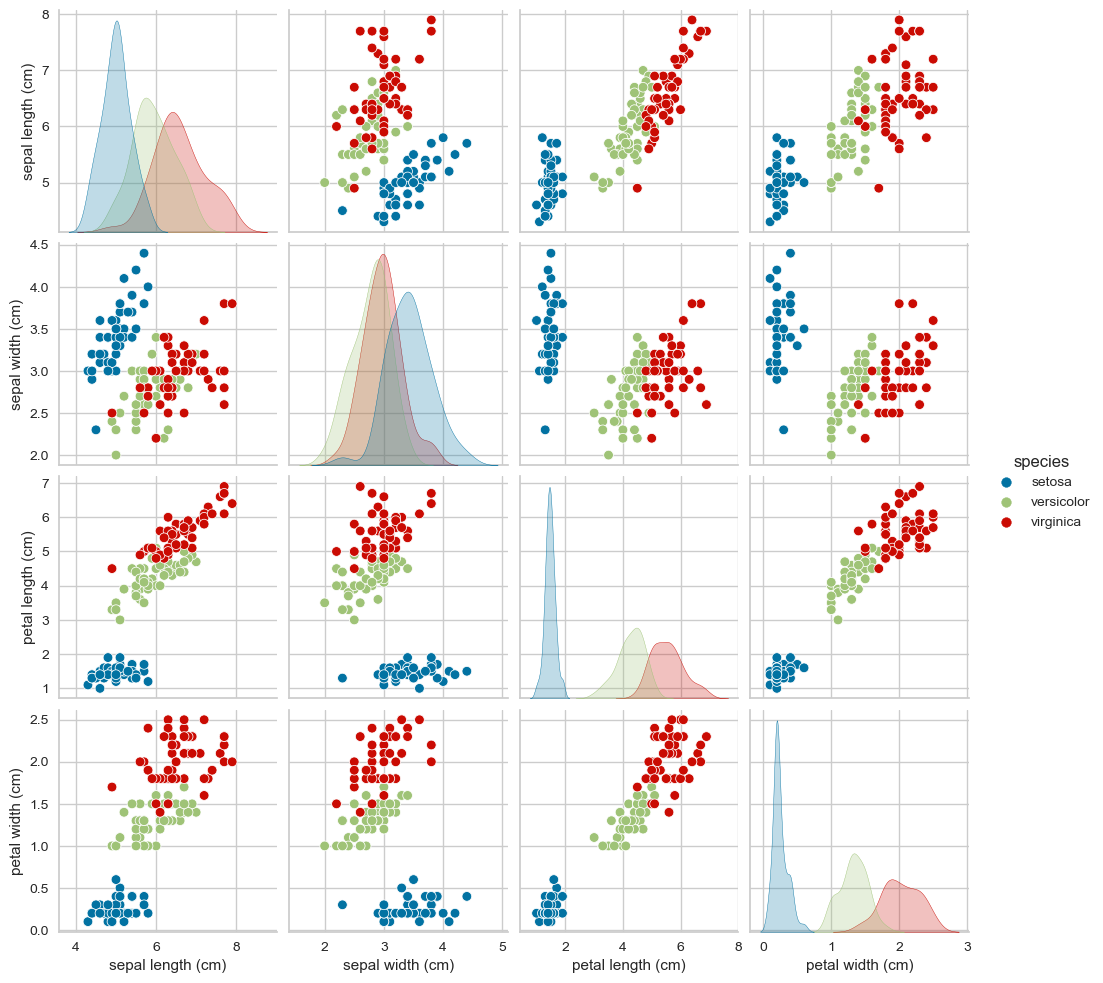

In [27]:
feature_names = iris.feature_names
target_names = iris.target_names

# 데이터프레임 생성
df = pd.DataFrame(X, columns=feature_names)
# 종에 따라 시각화
df['species'] = pd.Categorical.from_codes(y, target_names)

# 페어 플롯
sns.pairplot(df, hue='species')
plt.show()

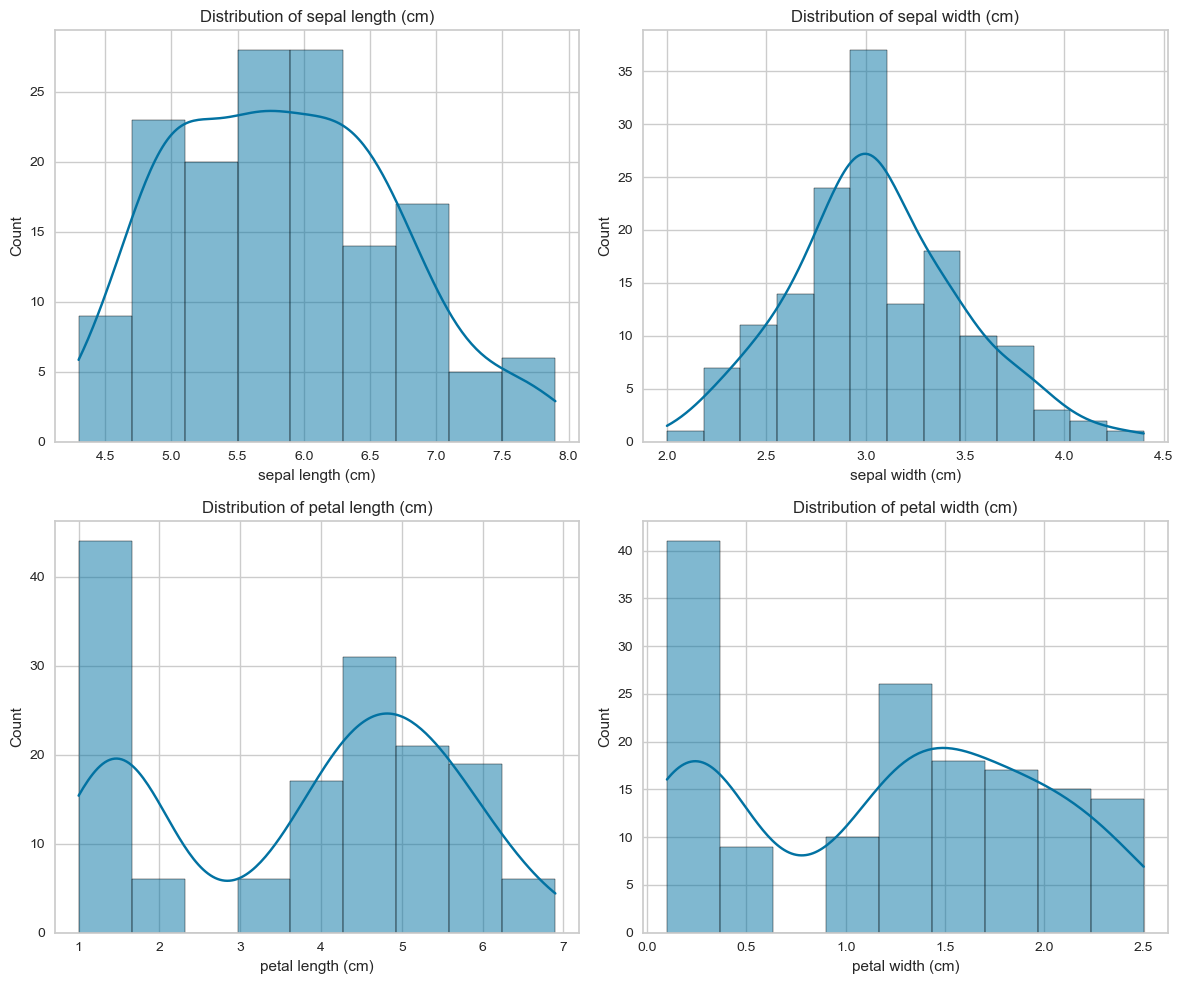

In [29]:
# 분포
plt.figure(figsize=(12, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

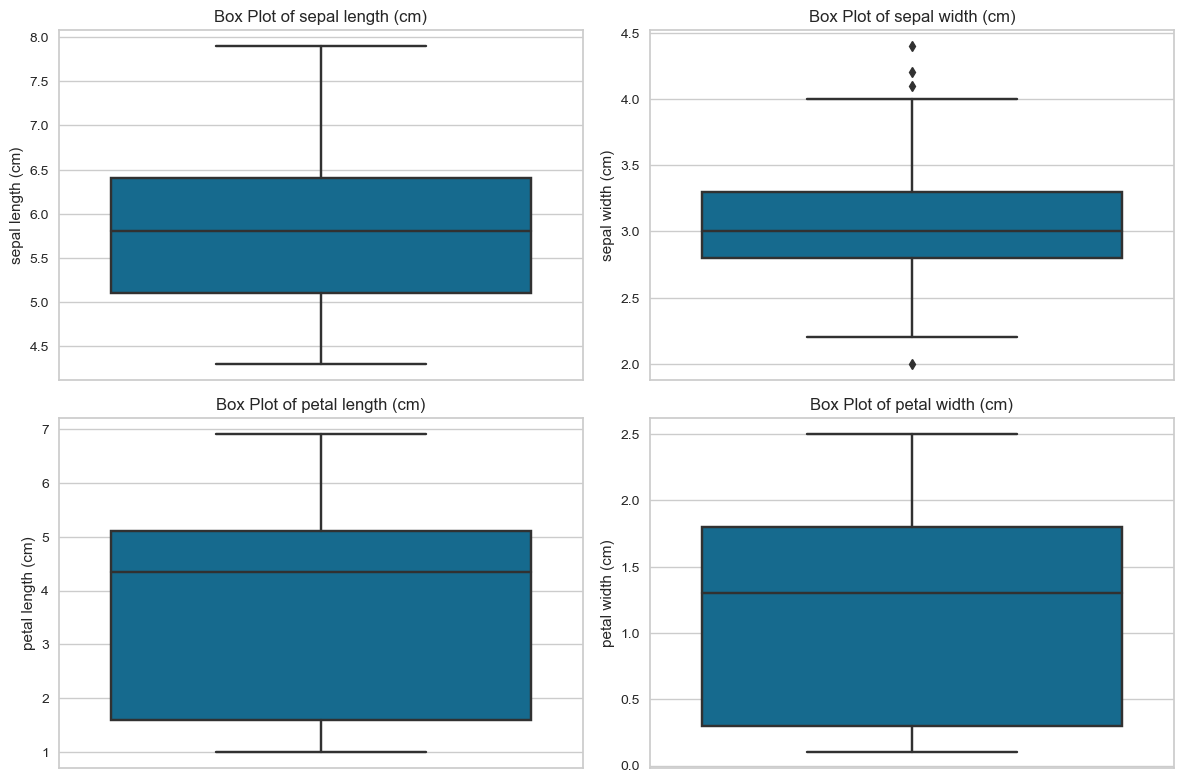

In [30]:
# 박스 플롯
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

- Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- 시각화를 위한 변환

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

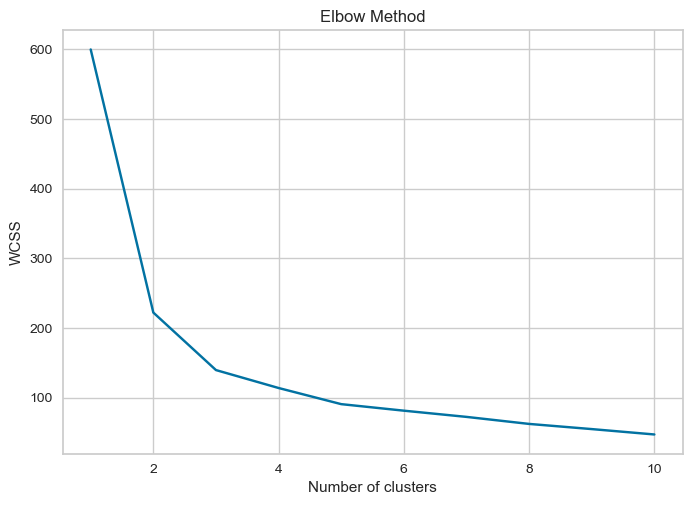

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=111) # 난수 설정
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

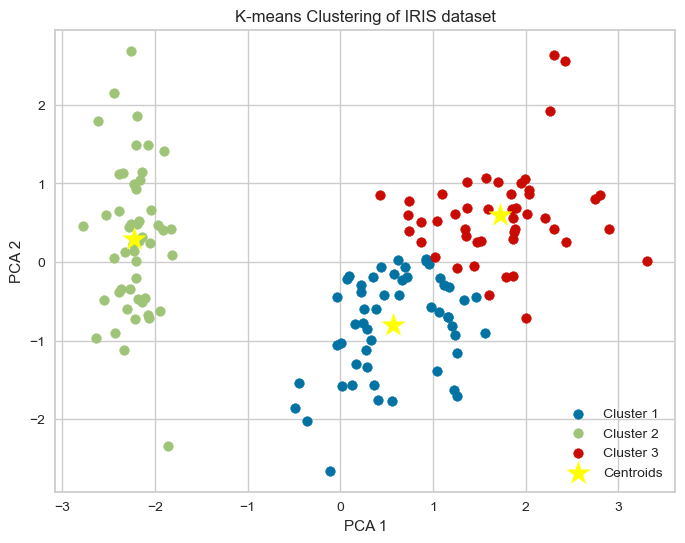

In [14]:
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i+1}')

# 클러스터 중심 시각화
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='yellow', label='Centroids', marker='*')

plt.title('K-means Clustering of IRIS dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [15]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.460


=> 클러스터링 결과가 비교적 괜찮다.

In [16]:
k = 2
kmeans_2 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans_2.fit_predict(X_scaled)

In [18]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.582


=> k = 2 개로 설정하는 것이 결과가 더 좋다.

---

In [31]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 데이터프레임 생성
df = pd.DataFrame(X, columns=feature_names)

In [35]:
# KMeans++ 클러스터링
scalers = {
    'Min-Max Scaler': MinMaxScaler(),
    'Standard Scaler': StandardScaler(),
    'Robust Scaler': RobustScaler()
}

silhouette_scores = {}

for name, scaler in scalers.items():
    # 스케일링
    X_scaled = scaler.fit_transform(X)
    
    # KMeans++ 클러스터링
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[name] = silhouette_avg

# 결과 출력
for name, score in silhouette_scores.items():
    print(f"{name}: Silhouette Score = {score:.4f}")


Min-Max Scaler: Silhouette Score = 0.6300
Standard Scaler: Silhouette Score = 0.5818
Robust Scaler: Silhouette Score = 0.5284


### 실루엣계수
- 실루엣 계수는 각각의 데이터가 해당 데이터와 같은 군집 내의 데이터와는 얼마나 가깝게 군집화가 되었고, 다른 군집에 있는 데이터와는 얼마나 멀리 분포되어 있는지를 나타내는 지표

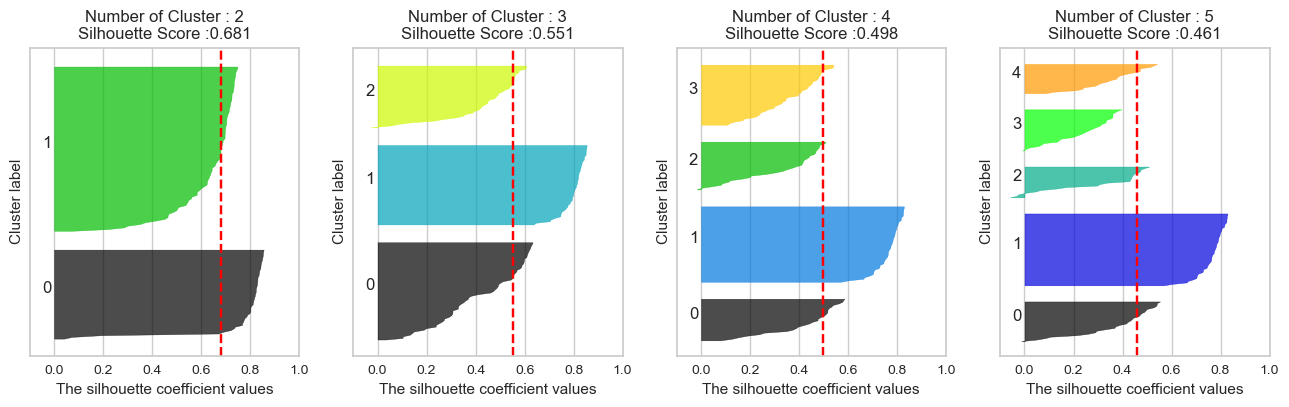

In [36]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# 
from sklearn.datasets import load_iris

iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)